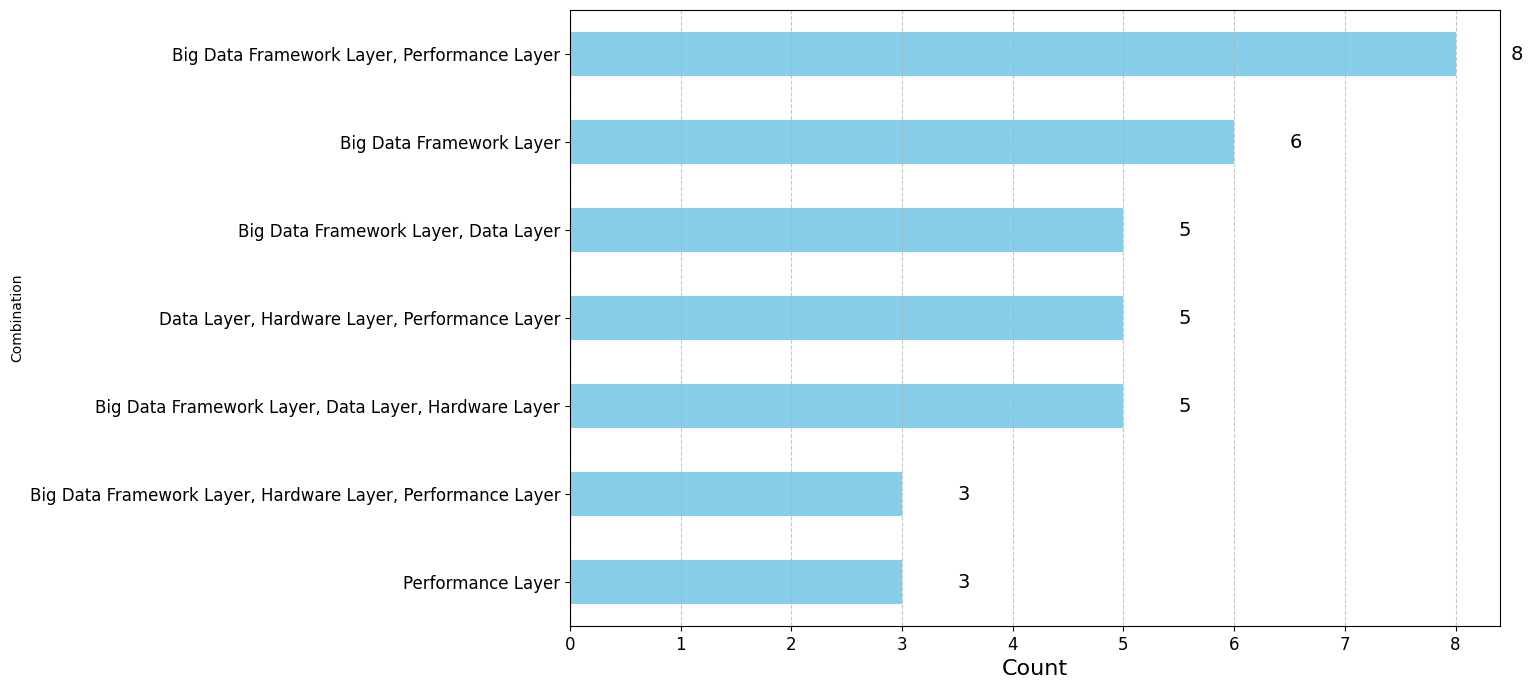

In [11]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Load the data from the CSV file
layers_df = pd.read_csv("data/layers.csv")

# Rename the columns for clarity
layers_df.columns = ['Title', 'Year', 'Layers']

# Split the layers and count the combinations
layers_df['Layers'] = layers_df['Layers'].str.split(', ')
layer_combinations = layers_df['Layers'].apply(lambda x: tuple(sorted(x)))
combination_counts = Counter(layer_combinations)

# Convert to DataFrame for plotting and get top 10 combinations
combination_df = pd.DataFrame(combination_counts.items(), columns=['Combination', 'Count']).sort_values(by='Count', ascending=False).head(7)

# Prepare the labels
combination_df['Combination'] = combination_df['Combination'].apply(lambda x: ', '.join(x))

# Plot the top 10 most used combinations with reduced width
plt.figure(figsize=(12, 8))
ax = combination_df.set_index('Combination').plot(kind='barh', legend=False, ax=plt.gca(), color='skyblue')

# Set plot labels and title with increased font size
plt.xlabel('Count', fontsize=16)
# plt.ylabel('Layer Combination', fontsize=16)
# plt.title('Top 7 Most Popular Combinations of Layers', fontsize=16)

# Increase font size of tick parameters
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Improve readability
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display count values on the bars with increased font size
for i in ax.patches:
    ax.text(i.get_width() + 0.5, i.get_y() + i.get_height() / 2, str(int(i.get_width())), va='center', fontsize=14)

plt.show()
